# Does the Species Exist in a Given Model

This ipynb serves as a starting point of RMG Question-Answering System by answering the question of `does the species exist in a given model?`.

- Input: 
    - mechanism with chem.inp and species_dictionary.txt
    
    - species of your interest
- Output:
    - yes or no
    
    - the reactions associated with the species if yes, none if no.

## first situation: when you know structure (e.g., SMILES) of the species

In [40]:
species_target = 'C=CCC[CH]CCCCCC'

In [41]:
# load model into memory
from rmgpy.chemkin import loadChemkinFile
from rmgpy.molecule.molecule import Molecule

path = 'data/PDD_DEDS_merge_add17/'
chemkinPath= path + 'chem.inp'
dictionaryPath = path + 'species_dictionary.txt'
species_list, reactions_list = loadChemkinFile(chemkinPath, dictionaryPath, readComments = False)

In [42]:
# search the target species in model
mol_tgt = Molecule().fromSMILES(species_target)

for spc in species_list:
    if spc.isIsomorphic(mol_tgt):
        print '{} is found in model with spc name {}'.format(mol_tgt, spc)

<Molecule "C=CCC[CH]CCCCCC"> is found in model with spc name HKH12(339)


## A second situation: when you know the label/index of species

In [43]:
target_spc_index = 34
target_spc_label = 'C8H8'

The spcies with index 34 is displayed below:


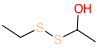

And its SMILES is CCSSC(C)O.
The spcies with label C8H8 is displayed below:


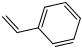

And its SMILES is C=CC1C=CC=CC=1.


In [44]:
from IPython.display import display
for spc in species_list:
    if spc.index == target_spc_index:
        print "The spcies with index {} is displayed below:".format(target_spc_index)
        display(spc)
        print "And its SMILES is {}.".format(spc.molecule[0].toSMILES())
        break
else:
    print "Cound not find species with index {}.".format(target_spc_index)

for spc in species_list:
    if spc.label == target_spc_label:
        print "The spcies with label {} is displayed below:".format(target_spc_label)
        display(spc)
        print "And its SMILES is {}.".format(spc.molecule[0].toSMILES())
        break
else:
    print "Cound not find species with label {}.".format(target_spc_label)

Next steps:

- render reactions associated with the target species

- accept target species input in more types, e.g., chemical name, InChI